**Tutorial 03 - Overfitting and Regularization**

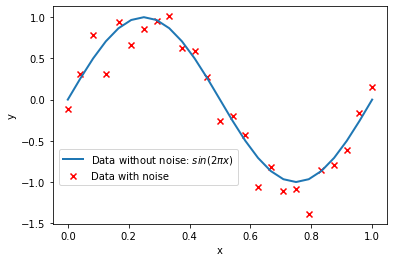

In [38]:
# directive to make plots inline as opposed to having popup plots
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from ipywidgets import *

var = 0.2

N = 25
x = np.linspace(0,1,N)
y_noiseless = np.sin(2*np.pi*x)
y = y_noiseless + np.random.normal(0, var, N)

plt.figure()
plt.plot(x,y_noiseless,linewidth=2.0, label=r'Data without noise: $sin(2 \pi x)$')
plt.scatter(x,y,color='red',marker='x',label=r'Data with noise')
plt.legend(loc = (0.02, 0.18))
plt.xlabel("x")
plt.ylabel("y")
plt.show() 

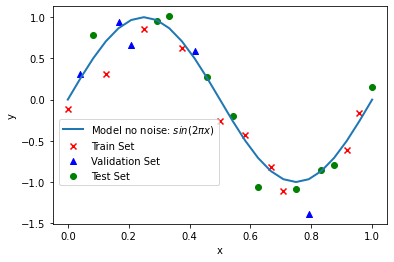

In [39]:
train_size = 10
val_size = 5
test_size = 10

indexes = np.arange(N, dtype=int)
np.random.seed(seed = 2)
np.random.shuffle(indexes)

# Training set
aux = indexes[:train_size]
aux = np.sort(aux)
x_train = x[aux]
y_train = y[aux]

# Validation set
aux = indexes[train_size: train_size + val_size]
aux = np.sort(aux)
x_val = x[aux]
y_val = y[aux]

# Test set
aux = indexes[-test_size:]
aux = np.sort(aux)
x_test = x[aux]
y_test = y[aux]

plt.figure()
plt.plot(x,y_noiseless,linewidth=2.0, label=r'Model no noise: $sin(2 \pi x)$')
plt.scatter(x_train, y_train, color='red', marker='x', label='Train Set')
plt.scatter(x_val, y_val,color='blue', marker='^', label='Validation Set')
plt.scatter(x_test, y_test, color='green', marker='o', label='Test Set')
plt.legend(loc = (0.02, 0.18))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [40]:
# Least squares polynomial fitting solution
# Implementation of the equation shown above
def polynomial_fit(X,T,M):
  A = np.power(X.reshape(-1,1),np.arange(0, M+1).reshape(1,-1))
  T = T.reshape(-1,1)
  W = np.dot(np.linalg.pinv(A),T)
  return W.ravel()

In [41]:
def plotmodel(M):
  coefs = polynomial_fit(x_train, y_train, M)[::-1]
  print("Weights:\n", coefs)
  p = np.poly1d(coefs)
  plt.figure()
  plt.plot(x,y_noiseless,linewidth = 1.5,label = r'Data no noise: $sin(2 \pi x)$')
  plt.scatter(x_train,y_train,color='red',label= "Train set")
  plt.xlabel("x")
  plt.ylabel(r'y')
  y_fit = p(x_train) 
  plt.plot(x_train,y_fit,linewidth = 1.0,label ="Polynomial Fit")
  plt.legend(loc=(0.02,0.02))
  plt.show()

interact(plotmodel,M=(0,9,1))

interactive(children=(IntSlider(value=4, description='M', max=9), Output()), _dom_classes=('widget-interact',)…

<function __main__.plotmodel>

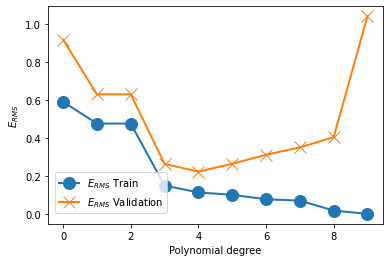

Model selected was a  polynomial of degree 4
Root mean squared test error: 0.292


In [42]:
def rms_error(X,T,W):
  p = np.poly1d(W)
  T_fit = p(X)
  E = np.sqrt(((T - T_fit)**2/T.size).sum())
  return E

m = range(10)
train = []
val = []

for M in m:
  W = polynomial_fit(x_train, y_train, M)[::-1]
  error_train = rms_error(x_train, y_train, W)
  error_val = rms_error(x_val, y_val, W)
  train.append(error_train)
  val.append(error_val)

plt.figure()
plt.plot(m,train,linewidth = 2.0,marker = 'o',markersize = 12,label = r'$E_{RMS}$ Train')
plt.plot(m,val,linewidth = 2.0,marker = 'x',markersize = 12,label = r'$E_{RMS}$ Validation')
plt.legend(loc = (0.02, 0.05))
plt.xlabel("Polynomial degree")
plt.ylabel(r'$E_{RMS}$')
plt.show()

best_M = np.argmin(val)
W = polynomial_fit(x_train, y_train, best_M)[::-1]
test_error = rms_error(x_test,y_test,W)
print("Model selected was a  polynomial of degree %d" %best_M)
print("Root mean squared test error: %.3f" %test_error)

In [43]:
def polynomial_fit_reg(X,T,M,lamb):
  N = X.shape[0]
  A = np.power(X.reshape(-1,1), np.arange(0, M+1).reshape(1,-1))
  lambda_matrix = lamb*N*np.eye(M+1)
  T = T.reshape(-1,1)
  aux = np.dot(A.T,A) + lambda_matrix
  aux = np.linalg.pinv(aux)
  aux2 = np.dot(A.T,T)
  W = np.dot(aux,aux2)
  return W.ravel()

In [44]:
def plotmodel2(M,log_lamb):
  lamb = np.exp(log_lamb)
  coefs = polynomial_fit_reg(x_train, y_train, M,lamb)[::-1]
  print("Weights:\n",coefs)
  print("Lambda\n", lamb)
  p = np.poly1d(coefs)
  plt.figure()
  plt.plot(x,y_noiseless,linewidth = 1.5,label = r'Data no noise: $sin(2 \pi x)$')
  plt.scatter(x_train,y_train,color='red',label= "Train set")
  plt.xlabel("x")
  plt.ylabel(r'y')
  y_fit = p(x_train) 
  plt.plot(x_train,y_fit,linewidth = 1.0,label ="Polynomial Fit")
  plt.legend(loc=(0.02,0.02))
  plt.show()
interact(plotmodel2,M=(0,9,1),log_lamb = (-40,-9,.1))

interactive(children=(IntSlider(value=4, description='M', max=9), FloatSlider(value=-25.0, description='log_la…

<function __main__.plotmodel2>

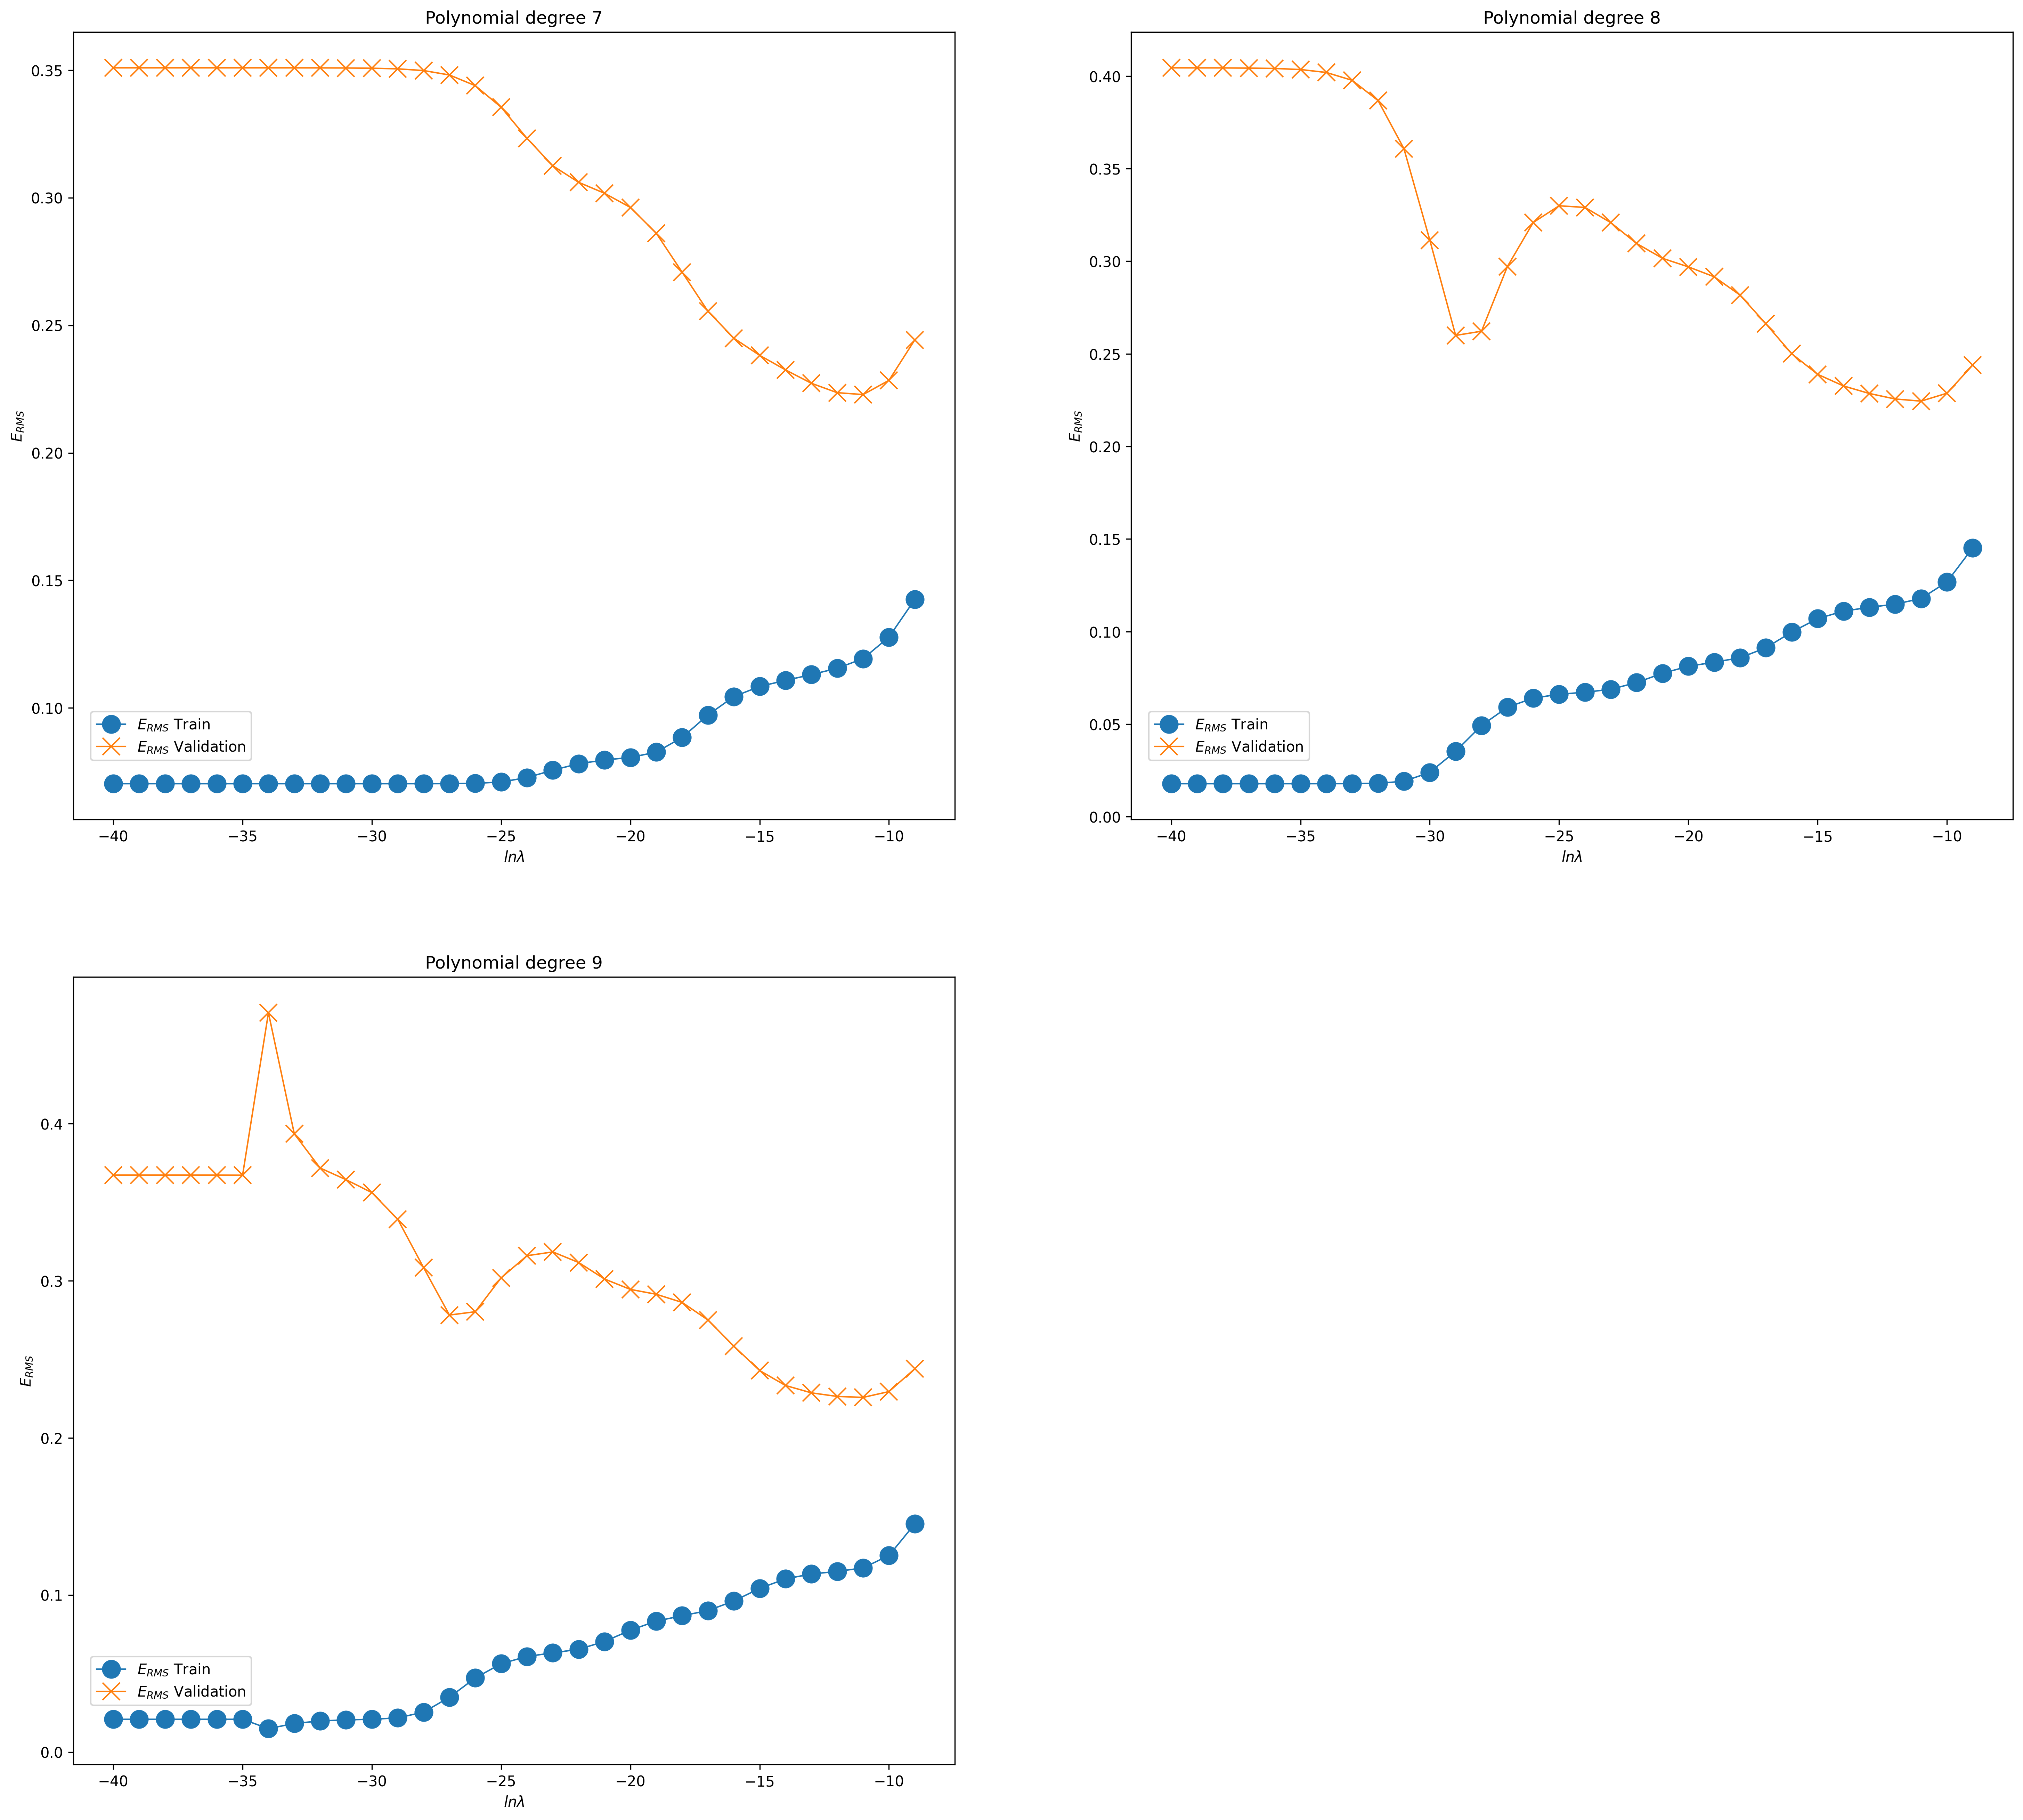

Model selected was a  polynome of degree 7 with lambda = 1.670170e-05
Root mean squared test error: 0.312


In [45]:
log_lamb = range(-40,-8) # regularization values
M = range(7,10) # different polynomial degrees
train = np.zeros((len(log_lamb), len(M)))
val = np.zeros((len(log_lamb), len(M)))

for (i,m) in enumerate(M):
  for (j,l) in enumerate(log_lamb):
    lamb = np.exp(l)
    coeffs = polynomial_fit_reg(x_train, y_train, m,lamb)[::-1]
    train[j,i] = rms_error(x_train,y_train,coeffs)
    val[j,i] = rms_error(x_val,y_val,coeffs)
    
plt.figure(figsize = (24,22), dpi = 300)
for (i,m) in enumerate(M):
  plt.subplot(2, 2, i + 1)
  plt.plot(log_lamb,train[:,i],linewidth = 1.0,marker = 'o',markersize = 12,label = r'$E_{RMS}$ Train')
  plt.plot(log_lamb,val[:,i],linewidth = 1.0,marker = 'x',markersize = 12,label = r'$E_{RMS}$ Validation')
  plt.legend(loc = (0.02, 0.075))
  plt.xlabel(r'$ln\lambda$')
  plt.ylabel(r'$E_{RMS}$')
  plt.title("Polynomial degree %d" %m)
plt.show()

# Model selection
best_M_reg = np.unravel_index(val.argmin(), val.shape)
W = polynomial_fit_reg(x_train, y_train, M[best_M_reg[1]], np.exp(log_lamb[best_M_reg[0]]))[::-1]
test_error = rms_error(x_test,y_test,W)
print("Model selected was a  polynome of degree %d with lambda = %e" %(M[best_M_reg[1]], np.exp(log_lamb[best_M_reg[0]])))
print("Root mean squared test error: %.3f" %test_error)